<a href="https://colab.research.google.com/github/aruaru0/SAM-TEST/blob/main/ultralytics_SAM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# インストール

In [1]:
!pip install ultralytics
# !pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 2.9 MB/s eta 0:00:00


In [4]:
!wget -O cat2.png https://github.com/aruaru0/SAM-TEST/blob/main/cat2.png?raw=true

--2024-01-18 07:01:28--  https://github.com/aruaru0/SAM-TEST/blob/main/cat2.png?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/aruaru0/SAM-TEST/raw/main/cat2.png [following]
--2024-01-18 07:01:28--  https://github.com/aruaru0/SAM-TEST/raw/main/cat2.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aruaru0/SAM-TEST/main/cat2.png [following]
--2024-01-18 07:01:28--  https://raw.githubusercontent.com/aruaru0/SAM-TEST/main/cat2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 638240 (623K) [image/png]
Saving

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

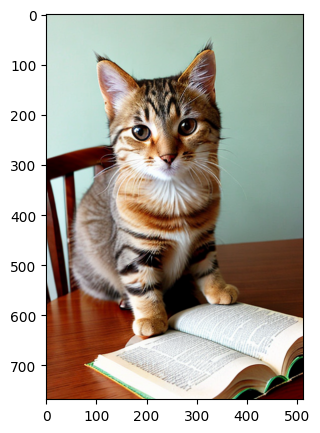

In [6]:
image = cv2.imread('cat2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('on')
plt.show()

In [7]:
from ultralytics import SAM

model = SAM('sam_b.pt')

model.info()

100%|██████████| 358M/358M [00:01<00:00, 253MB/s]


Model summary: 238 layers, 93735472 parameters, 93735472 gradients


(238, 93735472, 93735472, 0.0)

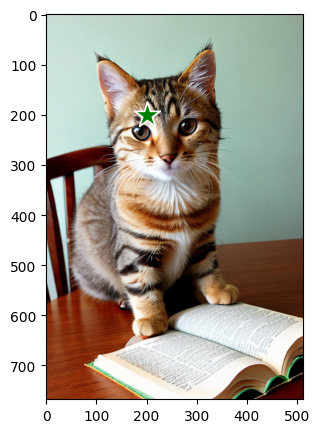

In [8]:
input_point = np.array([[200, 200]])
input_label = np.array([1])

plt.figure(figsize=(5,5))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()


0: 1024x1024 2250.7ms
Speed: 107.5ms preprocess, 2250.7ms inference, 40.9ms postprocess per image at shape (1, 3, 1024, 1024)


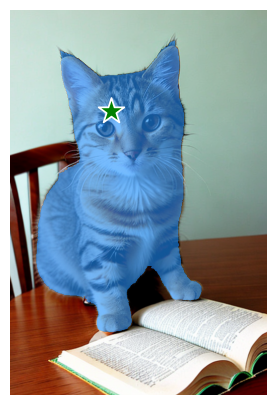

In [9]:
results = model(image, points=input_point, labels=input_label)[0]
plt.figure(figsize=(5,5))
plt.imshow(image)
show_mask(results.masks.data[0].cpu(), plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

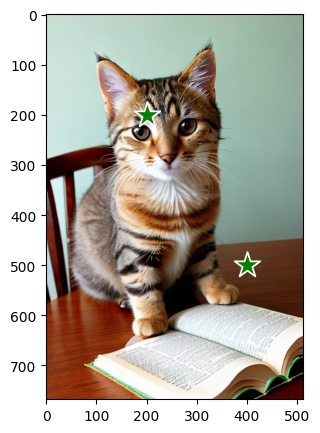

In [10]:
input_point = np.array([[200, 200], [400, 500]])
input_label = np.array([1, 1])

plt.figure(figsize=(5,5))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()


0: 1024x1024 531.9ms
Speed: 6.3ms preprocess, 531.9ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)


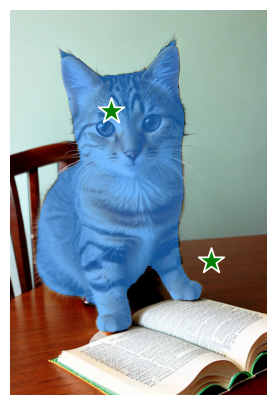

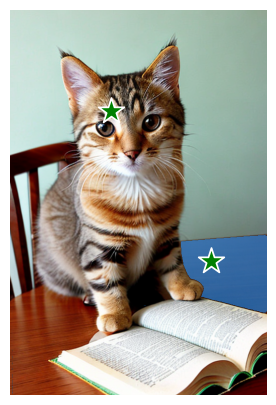

In [11]:
results = model(image, points=input_point, labels=input_label)[0]
for mask in results.masks:
  plt.figure(figsize=(5,5))
  plt.imshow(image)
  show_mask(mask.data[0].cpu(), plt.gca())
  show_points(input_point, input_label, plt.gca())
  plt.axis('off')
  plt.show()

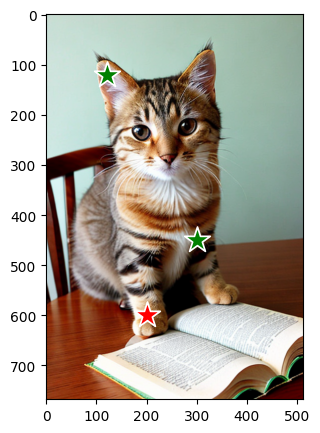

In [12]:
input_point = np.array([[120, 120], [300, 450], [200, 600]])
input_label = np.array([1, 1, 0])

plt.figure(figsize=(5,5))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()


0: 1024x1024 366.8ms
Speed: 6.7ms preprocess, 366.8ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)


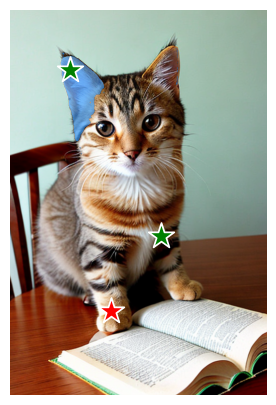

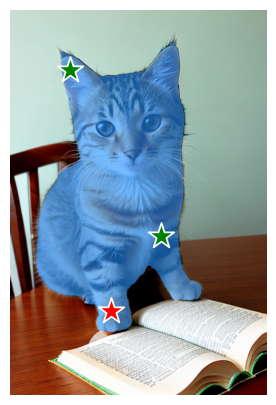

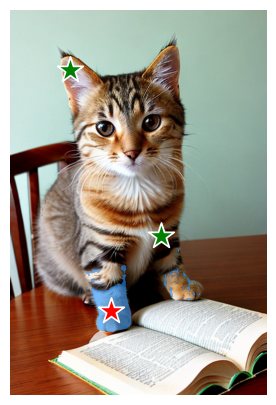

In [13]:
results = model(image, points=input_point, labels=input_label)[0]
for mask in results.masks:
  plt.figure(figsize=(5,5))
  plt.imshow(image)
  show_mask(mask.data[0].cpu(), plt.gca())
  show_points(input_point, input_label, plt.gca())
  plt.axis('off')
  plt.show()


0: 1024x1024 365.8ms
Speed: 6.2ms preprocess, 365.8ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)


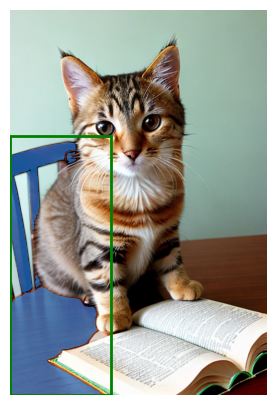

In [14]:
input_box = np.array([0, 250, 200, 768])
results = model(image, bboxes=input_box)[0]
for mask in results.masks:
  plt.figure(figsize=(5,5))
  plt.imshow(image)
  show_mask(mask.data[0].cpu(), plt.gca())
  show_box(input_box, plt.gca())
  plt.axis('off')
  plt.show()


0: 1024x1024 368.5ms
Speed: 6.7ms preprocess, 368.5ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)


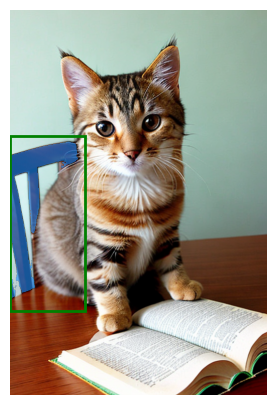

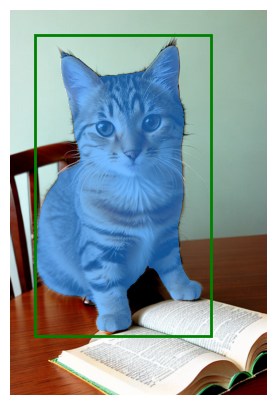

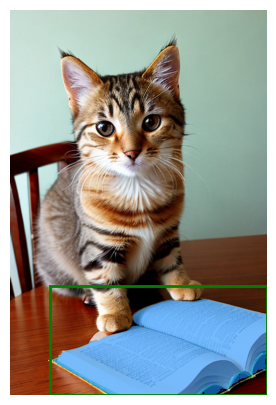

In [15]:
input_boxes = torch.tensor([
    [0, 250, 150, 600],
    [50, 50, 400, 650],
    [80, 550, 512, 768]
],)

results = model(image, bboxes=input_boxes)[0]
for mask, input_box in zip(results.masks, input_boxes):
  plt.figure(figsize=(5,5))
  plt.imshow(image)
  show_mask(mask.data[0].cpu(), plt.gca())
  show_box(input_box, plt.gca())
  plt.axis('off')
  plt.show()

100%|██████████| 38.8M/38.8M [00:00<00:00, 194MB/s]

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)



image 1/1 /content/cat2.png: 1024x1024 12.0ms
Speed: 0.0ms preprocess, 12.0ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict


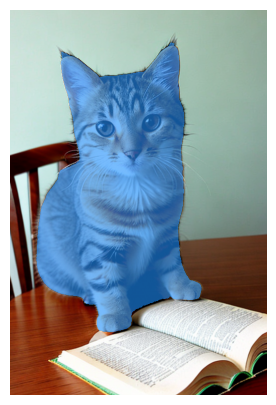

In [16]:
from ultralytics.models.sam import Predictor as SAMPredictor

# Create SAMPredictor
overrides = dict(conf=0.25, task='segment', mode='predict', imgsz=1024, model="mobile_sam.pt")
predictor = SAMPredictor(overrides=overrides)

# Set image
predictor.set_image("cat2.png")  # set with image file
results = predictor(bboxes=[50, 50, 400, 650])[0]

for mask in results.masks:
  plt.figure(figsize=(5,5))
  plt.imshow(image)
  show_mask(mask.data[0].cpu(), plt.gca())
  plt.axis('off')
  plt.show()

In [17]:
from ultralytics.models.sam import Predictor as SAMPredictor

# Create SAMPredictor
overrides = dict(conf=0.25, task='segment', mode='predict', imgsz=(640, 448), model="sam_b.pt")
predictor = SAMPredictor(overrides=overrides)

# Segment with additional args
results = predictor(source=image, crop_n_layers=1, points_stride=64)[0]


Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
0: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 205284.7ms
Speed: 5.2ms preprocess, 205284.7ms inference, 2.2ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict2


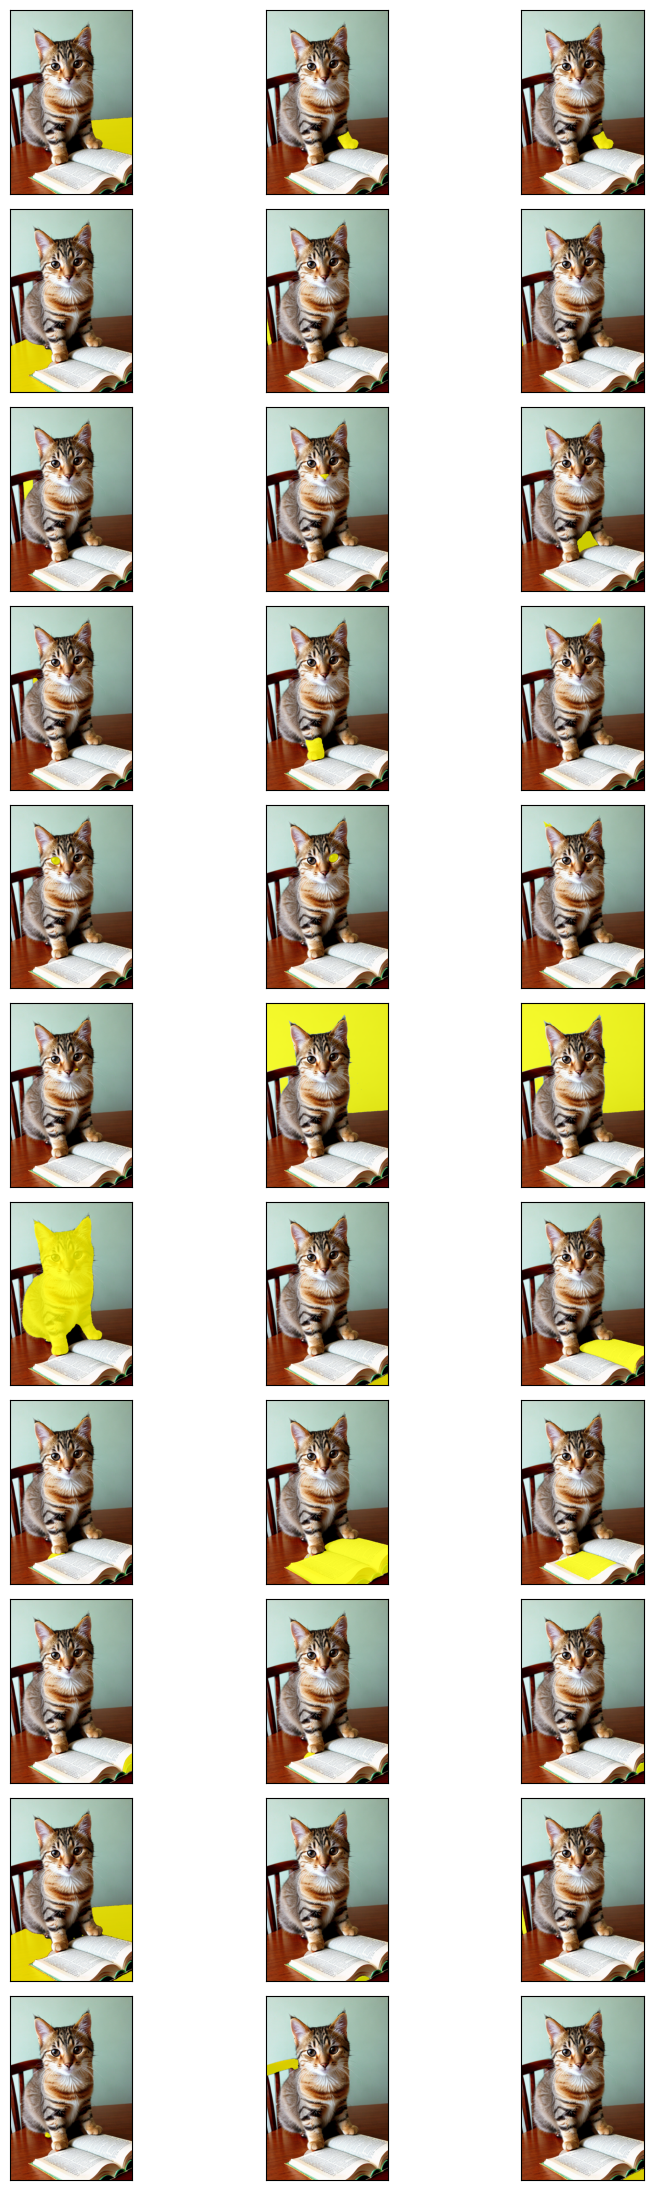

In [18]:
from torchvision.utils import draw_segmentation_masks

n = len(results.masks)
m = 3

flg, axes = plt.subplots(nrows = (n+m//2)//m, ncols = m, tight_layout=True, figsize=(3*m, 2*(n+m//2)//m))

for i in range(len(results.masks)) :
  img = torch.tensor(image).permute(2,0,1)
  mask =  results.masks[i].data[0].cpu()
  x = draw_segmentation_masks(img, mask, colors="yellow")

  axes[i//m, i%m].imshow(x.permute(1,2,0))
  axes[i//m, i%m].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

plt.show()

In [19]:
from ultralytics.data.annotator import auto_annotate

auto_annotate(data="cat2.png", det_model="yolov8x.pt", sam_model='sam_b.pt')

100%|██████████| 131M/131M [00:00<00:00, 228MB/s]



image 1/1 /content/cat2.png: 640x448 1 cat, 1 chair, 1 book, 198.3ms
Speed: 2.7ms preprocess, 198.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)
